In [1]:
#!/usr/local/bin/python

import sys
sys.path.append('/Users/danielburgess/Desktop/astro/SED/GAMERA/lib')
import gappa as gp
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.constants import c
import astropy.units as u
import matplotlib.pyplot as plt

In [2]:
if __name__ == "__main__":


    '''
        define arbitrary particle spectra. they need to be 
        2-dimensional arrays (or vectors if using C++) with each
        entry holding a tuple: E(erg) - dN/dE (1/erg). Let's define a 
        logparabola and a power-law as example spectra. Of course the 
        output of the Particle class is designed to use as an input for
        the Radiation class. This is explained in another tutorial.
    '''

    # define reference energy as 1 TeV
    e_ref = gp.TeV_to_erg

    '''
        example: define a power-law spectrum
    '''
    # define the energy range of the particles (total energy), here between 1 GeV and 1 PeV
    energy_in_erg_pl = np.logspace(-3,3,200) * gp.TeV_to_erg

    # spectral parameters for the power-law: index and total energy in particles
    alpha_pl = 2; e_total_pl = 1e49 # erg

    # make the power-law
    power_law = energy_in_erg_pl**-alpha_pl

    # renormalise it to e_total_protons using the Integrator (GSL) 
    # in the Utils class
    fu = gp.Utils()
    power_law *= e_total_pl / fu.Integrate(list(zip(energy_in_erg_pl,power_law * energy_in_erg_pl)))

    # zip into a 2D-list
    power_law_spectrum = np.array(list(zip(energy_in_erg_pl,power_law)))


    '''
        example: define a logparabola
    '''
    energy_in_erg_logpar = np.logspace(-5,3,200) * gp.TeV_to_erg

    # spectral parameters: index(alpha_logpar), curvature(beta_logpar), total energy in particles
    alpha_logpar = 2.3; beta_logpar = 0.3; e_total_logpar = 1e46

    # calculate logparabola
    logparabola = (energy_in_erg_logpar/e_ref)**-(alpha_logpar + beta_logpar * np.log10((energy_in_erg_logpar/e_ref)))

    logparabola *= e_total_logpar / fu.Integrate(list(zip(energy_in_erg_logpar,energy_in_erg_logpar * logparabola)))

    logparabola_spectrum = np.array(list(zip(energy_in_erg_logpar,logparabola)))
    

    '''
        now set the parameters needed for the calculation 
        of the photon emission
    '''
    b_field = 5e-5 # Gauss
    ambient_density = 10 # 1/cm^3
    # the following are the parameters of the CMB
    t_cmb = 2.7; edens_cmb = 0.25 * gp.eV_to_erg #erg
    distance = 3.5e3 # optional, in parsec. If not set or equals zero, differential 
                   # photon production rate instead of flux will be calculated

    '''
        create a Radiation object and set it up
    '''
    fr = gp.Radiation()
    fr.SetAmbientDensity(ambient_density)
    fr.SetBField(b_field)
    fr.AddThermalTargetPhotons(t_cmb,edens_cmb)
    fr.SetDistance(distance)

    '''
        define the particle type. this will determine which radiation processes
        will be calculated. you can even set both!
    '''
    fr.SetProtons(power_law_spectrum)
    fr.SetElectrons(logparabola_spectrum)

    '''
        calculate the flux at an arbitrary range of gamma-ray energies (in erg)
    '''
    # define energies at which gamma-ray emission should be calculated 
    e = np.logspace(-6,15,200) * gp.eV_to_erg

    # do the calculation
    fr.CalculateDifferentialPhotonSpectrum(e)


    '''
        extract the different SEDs
    '''
    total_sed = fr.GetTotalSED() # SED, E^2dNdE (erg/s/cm^2) vs E (TeV)
    #pp_sed = fr.GetPPSED() 
    synch_sed = fr.GetSynchrotronSED() 
    brems_sed = fr.GetBremsstrahlungSED()
    ic_sed = fr.GetICSED()

    # in order to conveniently use them with numpy, transpose to numpy arrays
    total_sed = np.array(total_sed)
    #pp_sed = np.array(pp_sed)
    synch_sed = np.array(synch_sed)
    brems_sed = np.array(brems_sed)
    ic_sed = np.array(ic_sed)

In [3]:
    #Read in data

In [4]:
    # Set units
    fermi['energy'].unit = u.eV
    fermi['flux'].unit = u.erg/u.cm**2/u.s
    fermi['flux_error'].unit = u.erg/u.cm**2/u.s
    hard_xray_A['energy'].unit = u.eV
    hard_xray_A['flux'].unit = u.erg/u.cm**2/u.s
    hard_xray_B['energy'].unit = u.eV
    hard_xray_B['flux'].unit = u.erg/u.cm**2/u.s
    soft_xray['energy'].unit = u.eV
    soft_xray['flux'].unit = u.erg/u.cm**2/u.s
    chandra['energy'].unit = u.eV
    chandra['flux'].unit = u.erg/u.cm**2/u.s
    vhe['energy'].unit = u.eV
    vhe['flux'].unit = u.erg/u.cm**2/u.s
    ehwc['energy'].unit = u.eV
    ehwc['flux'].unit = u.erg/u.cm**2/u.s

In [5]:
    # Read in errorbars
    fxerr = ([fermi['energy_edge_lo'], fermi['energy_edge_hi']])
    fyerr = (fermi['flux_error'])
    haxerr = ([hard_xray_A['energy_edge_lo'], hard_xray_A['energy_edge_hi']])
    hayerr = (hard_xray_A['flux_error'])
    hbxerr = ([hard_xray_B['energy_edge_lo'], hard_xray_B['energy_edge_hi']])
    hbyerr = (hard_xray_B['flux_error'])
    sxerr = ([soft_xray['energy_edge_lo']*1e-9, soft_xray['energy_edge_hi']*1e-9])
    syerr = (soft_xray['flux_error'])
    cxerr = ([chandra['energy_edge_lo']*1e-9, chandra['energy_edge_hi']*1e-9])
    cyerr = (chandra['flux_error'])
    vxerr = ([vhe['energy_edge_lo']*1e-12, vhe['energy_edge_hi']*1e-12])
    vyerr = (vhe['flux_error'])
    exerr = ([ehwc['energy_edge_lo'], ehwc['energy_edge_hi']])
    eyerr = (ehwc['flux_error'])

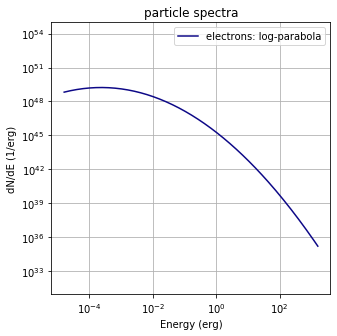

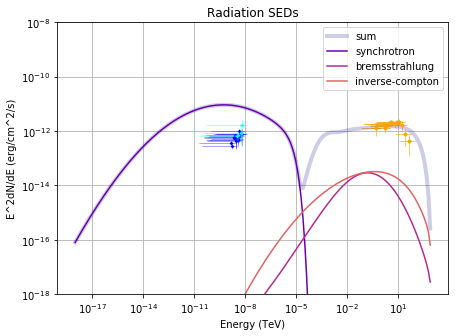

In [7]:
    '''
        ########## PLOTS ################################
        plot particle spectra, radiation spectra and SEDs
        make a plot showing the particle spectra
    '''
    # particle spectra plot
    f,ax = plt.subplots(figsize=(5,5))
    ax.set_prop_cycle('color',plt.get_cmap('plasma')(np.linspace(0., .8, 2))) #
    #plt.loglog(power_law_spectrum[:,0],power_law_spectrum[:,1],label="protons: power-law")
    plt.loglog(logparabola_spectrum[:,0],logparabola_spectrum[:,1],label="electrons: log-parabola")
    plt.xlabel("Energy (erg)")
    plt.ylabel("dN/dE (1/erg)")
    plt.ylim(ymin=1e31,ymax=1e55)
    plt.legend()
    plt.title("particle spectra")
    plt.grid()
    f.savefig("particle_spectra.png",bbox_inches='tight')

    # SED plot
    f,ax = plt.subplots(figsize=(7,5))
    ax.set_prop_cycle('color',plt.get_cmap('plasma')(np.linspace(0., .8, 5)))  #
    
    
        # Plot HESS data
    plt.errorbar(vhe['energy']*1e-12, vhe['flux'], xerr=vxerr, yerr=vyerr, fmt='.', c='orange', elinewidth=0.6)
    
        # Plot Chandra data
    plt.errorbar(chandra['energy']*1e-9, chandra['flux'], xerr=cxerr, yerr=cyerr, zorder=9, fmt=',', c='cyan', elinewidth=0.6, alpha=0.6)
    plt.scatter(chandra['energy']*1e-9, chandra['flux'], marker='D', zorder=9, s=3, c='cyan')
    
    # Plot XMM data
    plt.errorbar(soft_xray['energy']*1e-9, soft_xray['flux'], xerr=sxerr, yerr=syerr, zorder=5, fmt=',', c='blue', elinewidth=0.6, alpha=0.6)
    plt.scatter(soft_xray['energy']*1e-9, soft_xray['flux'], marker='D', zorder=5, s=3, c='blue')
    
    plt.loglog(total_sed[:,0],total_sed[:,1],lw=4,alpha=0.2,label="sum")
    #plt.loglog(pp_sed[:,0],pp_sed[:,1],label="p-p")
    plt.loglog(synch_sed[:,0],synch_sed[:,1],label="synchrotron")
    plt.loglog(brems_sed[:,0],brems_sed[:,1],label="bremsstrahlung")
    plt.loglog(ic_sed[:,0],ic_sed[:,1],label="inverse-compton")
    plt.xlabel("Energy (TeV)")
    plt.ylabel("E^2dN/dE (erg/cm^2/s)")
    plt.ylim(ymin=1e-18,ymax=1e-8)
    plt.legend()
    plt.grid()
    plt.title("Radiation SEDs")
    f.savefig("radiation_SEDs.png",bbox_inches='tight')